<a href="https://colab.research.google.com/github/JingleiZhu-Jane/A14-Assignment/blob/main/Assignment8_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import os
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
proj_dir = '/content/drive/MyDrive/AI4Science/TCGA_Esophageal_Cancer_(ESCA)'
os.chdir(proj_dir)
!ls

Mounted at /content/drive
TCGA.ESCA.sampleMap_ESCA_clinicalMatrix  TCGA.ESCA.sampleMap_HiSeqV2_PANCAN.gz


In [7]:
!pip install sparse_lmm

In [8]:
# Read file

import pandas as pd
import numpy as np

clinical_data = pd.read_csv('TCGA.ESCA.sampleMap_ESCA_clinicalMatrix', sep='\t', index_col=0)
gene_data = pd.read_csv('TCGA.ESCA.sampleMap_HiSeqV2_PANCAN.gz', sep='\t', index_col=0)


In [9]:
# Display clinical dataset
clinical_data.head()

,CDE_ID_3226963,_INTEGRATION,_PATIENT,_cohort,_primary_disease,_primary_site,additional_pharmaceutical_therapy,additional_radiation_therapy,additional_treatment_completion_success_outcome,age_at_initial_pathologic_diagnosis,...,_GENOMIC_ID_TCGA_ESCA_exp_HiSeqV2,_GENOMIC_ID_TCGA_ESCA_exp_HiSeq,_GENOMIC_ID_TCGA_ESCA_miRNA_HiSeq,_GENOMIC_ID_TCGA_ESCA_mutation_ucsc_maf_gene,_GENOMIC_ID_TCGA_ESCA_gistic2,_GENOMIC_ID_TCGA_ESCA_gistic2thd,_GENOMIC_ID_TCGA_ESCA_mutation_broad_gene,_GENOMIC_ID_TCGA_ESCA_exp_HiSeqV2_exon,_GENOMIC_ID_TCGA_ESCA_mutation_bcgsc_gene,_GENOMIC_ID_TCGA_ESCA_PDMRNAseqCNV
sampleID,,,,,,,,,,,,,,,,,,,,,
TCGA-2H-A9GF-01,MSI-L,TCGA-2H-A9GF-01,TCGA-2H-A9GF,TCGA Esophageal Cancer (ESCA),esophageal carcinoma,Esophagus,NaN,NaN,NaN,67,...,2666431c-515b-4088-a448-baf7c52106d8,TCGA-2H-A9GF-01A-11R-A37I-31,TCGA-2H-A9GF-01,TCGA-2H-A9GF-01A-11D-A37C-09,TCGA-2H-A9GF-01A-11D-A37B-01,TCGA-2H-A9GF-01A-11D-A37B-01,TCGA-2H-A9GF-01A-11D-A37C-09,2666431c-515b-4088-a448-baf7c52106d8,TCGA-2H-A9GF-01A-11D-A37C-09,TCGA-2H-A9GF-01
TCGA-2H-A9GG-01,MSI-L,TCGA-2H-A9GG-01,TCGA-2H-A9GG,TCGA Esophageal Cancer (ESCA),esophageal carcinoma,Esophagus,NaN,NaN,NaN,66,...,9fcd3933-2651-4c64-8c77-3dac4d8ea595,TCGA-2H-A9GG-01A-11R-A37I-31,TCGA-2H-A9GG-01,NaN,NaN,NaN,NaN,9fcd3933-2651-4c64-8c77-3dac4d8ea595,NaN,NaN
TCGA-2H-A9GH-01,MSS,TCGA-2H-A9GH-01,TCGA-2H-A9GH,TCGA Esophageal Cancer (ESCA),esophageal carcinoma,Esophagus,NaN,NaN,NaN,44,...,775bb1a6-0463-4e78-bc3f-596e3a5eb38f,TCGA-2H-A9GH-01A-11R-A37I-31,TCGA-2H-A9GH-01,TCGA-2H-A9GH-01A-11D-A37C-09,TCGA-2H-A9GH-01A-11D-A37B-01,TCGA-2H-A9GH-01A-11D-A37B-01,TCGA-2H-A9GH-01A-11D-A37C-09,775bb1a6-0463-4e78-bc3f-596e3a5eb38f,TCGA-2H-A9GH-01A-11D-A37C-09,TCGA-2H-A9GH-01
TCGA-2H-A9GI-01,MSS,TCGA-2H-A9GI-01,TCGA-2H-A9GI,TCGA Esophageal Cancer (ESCA),esophageal carcinoma,Esophagus,NaN,NaN,NaN,68,...,3e9a405f-cb27-4773-b501-57a2eaf833d4,TCGA-2H-A9GI-01A-11R-A37I-31,TCGA-2H-A9GI-01,TCGA-2H-A9GI-01A-11D-A37C-09,TCGA-2H-A9GI-01A-11D-A37B-01,TCGA-2H-A9GI-01A-11D-A37B-01,TCGA-2H-A9GI-01A-11D-A37C-09,3e9a405f-cb27-4773-b501-57a2eaf833d4,TCGA-2H-A9GI-01A-11D-A37C-09,TCGA-2H-A9GI-01
TCGA-2H-A9GJ-01,MSS,TCGA-2H-A9GJ-01,TCGA-2H-A9GJ,TCGA Esophageal Cancer (ESCA),esophageal carcinoma,Esophagus,NaN,NaN,NaN,57,...,67bda296-5e65-45a9-962e-a99f51a12e14,TCGA-2H-A9GJ-01A-11R-A37I-31,TCGA-2H-A9GJ-01,TCGA-2H-A9GJ-01A-11D-A37C-09,TCGA-2H-A9GJ-01A-11D-A37B-01,TCGA-2H-A9GJ-01A-11D-A37B-01,TCGA-2H-A9GJ-01A-11D-A37C-09,67bda296-5e65-45a9-962e-a99f51a12e14,TCGA-2H-A9GJ-01A-11D-A37C-09,TCGA-2H-A9GJ-01


In [10]:
# Display gene dataset
gene_data.head()

,TCGA-L5-A4OF-01,TCGA-LN-A49R-01,TCGA-Z6-A9VB-01,TCGA-L5-A8NF-01,TCGA-2H-A9GG-01,TCGA-IG-A3QL-01,TCGA-VR-AA7B-01,TCGA-2H-A9GN-01,TCGA-L7-A6VZ-01,TCGA-L5-A4OF-11,...,TCGA-L5-A4ON-01,TCGA-LN-A4A1-01,TCGA-R6-A8WC-01,TCGA-L5-A4OR-11,TCGA-L5-A88Z-01,TCGA-JY-A6FG-01,TCGA-L5-A4OM-01,TCGA-Z6-A8JE-01,TCGA-L5-A4OQ-01,TCGA-M9-A5M8-01
sample,,,,,,,,,,,,,,,,,,,,,
ARHGEF10L,1.346108,-0.900892,-0.284892,0.743108,2.075308,-2.573692,0.204308,2.126808,-0.005492,0.108108,...,0.474308,0.026308,1.397708,0.204708,-1.251092,0.742408,-0.346092,-0.051892,1.588408,1.040308
HIF3A,6.799274,-1.649026,-2.676126,1.323974,1.644074,4.542674,1.987874,-0.526626,0.983874,3.616474,...,0.793874,-2.759026,1.469874,4.360974,-2.890026,-3.941826,1.259274,5.328074,4.529274,-2.615326
RNF17,8.020965,0.335165,0.207865,-0.531035,-0.531035,0.316065,-0.197535,-0.531035,-0.200335,-0.531035,...,-0.531035,-0.531035,-0.531035,-0.531035,-0.136835,-0.531035,-0.149235,0.277265,-0.531035,-0.531035
RNF10,-0.052472,-0.162772,-0.103472,0.199728,-0.143172,-0.542672,-0.081372,0.002928,0.715428,0.504128,...,0.193828,-0.111372,0.298328,0.914828,0.218628,0.984628,0.005928,-0.025472,-0.032372,0.095328
RNF11,-0.727578,0.226422,0.045122,0.040222,-0.389978,-0.189378,0.569622,0.145622,-0.591578,0.056922,...,0.014822,0.940222,-1.251278,0.592822,-0.431478,0.851022,0.293222,0.706922,-0.397778,0.120722


In [12]:
# Set Basic info

trait = 'Esophageal_Cancer'
condition = 'Depression'
condition_col = 'TPH2'

gene_list = gene_data.index.tolist()
# Get the feature dimension of clinical data, and the number of genes
col_offset = len(clinical_data.columns)
num_genes = len(gene_list)
print(f'The clinical dataset has {col_offset} features, and the gene dataset includes {num_genes} genes')


The clinical dataset has 120 features, and the gene dataset includes 20530 genes


In [13]:
# Merge clinical_data and gene_data on their indices - sample_ID, corresponding to each person
merged_data = clinical_data.join(gene_data.T)
merged_data.head()

,CDE_ID_3226963,_INTEGRATION,_PATIENT,_cohort,_primary_disease,_primary_site,additional_pharmaceutical_therapy,additional_radiation_therapy,additional_treatment_completion_success_outcome,age_at_initial_pathologic_diagnosis,...,TULP2,NPY5R,GNGT2,GNGT1,TULP3,PTRF,BCL6B,GSTK1,SELP,SELS
sampleID,,,,,,,,,,,,,,,,,,,,,
TCGA-2H-A9GF-01,MSI-L,TCGA-2H-A9GF-01,TCGA-2H-A9GF,TCGA Esophageal Cancer (ESCA),esophageal carcinoma,Esophagus,NaN,NaN,NaN,67,...,0.646322,-0.382817,-1.230133,1.01511,-0.429477,-1.012586,0.106073,-0.827495,0.259067,-1.428812
TCGA-2H-A9GG-01,MSI-L,TCGA-2H-A9GG-01,TCGA-2H-A9GG,TCGA Esophageal Cancer (ESCA),esophageal carcinoma,Esophagus,NaN,NaN,NaN,66,...,-0.748878,-1.587117,-0.224433,3.53901,-0.964877,-1.049986,-0.431427,-0.706995,2.340467,-1.049812
TCGA-2H-A9GH-01,MSS,TCGA-2H-A9GH-01,TCGA-2H-A9GH,TCGA Esophageal Cancer (ESCA),esophageal carcinoma,Esophagus,NaN,NaN,NaN,44,...,-0.301178,-1.587117,-0.773233,1.56381,-0.829677,-1.502386,-0.810627,-1.082495,0.795767,0.119788
TCGA-2H-A9GI-01,MSS,TCGA-2H-A9GI-01,TCGA-2H-A9GI,TCGA Esophageal Cancer (ESCA),esophageal carcinoma,Esophagus,NaN,NaN,NaN,68,...,-0.748878,-1.587117,-1.576033,-1.28139,-1.311377,-1.231386,0.285473,0.053505,0.982167,0.308788
TCGA-2H-A9GJ-01,MSS,TCGA-2H-A9GJ-01,TCGA-2H-A9GJ,TCGA Esophageal Cancer (ESCA),esophageal carcinoma,Esophagus,NaN,NaN,NaN,57,...,1.729622,2.379483,-2.163333,2.01751,-0.448977,-0.259786,-0.701427,-0.750295,0.332767,0.098188


In [14]:
# Only select relevant columns

#input_cols = [condition_col] + merged_data.columns[col_offset: col_offset + num_genes].tolist()
feature_cols = [condition_col] + gene_list
merged_data = merged_data[feature_cols]

# Remove sample rows with missing columns.
threshold_rows = 0.8 * len(merged_data)
rows_after_any = len(merged_data.dropna(how='any'))

# Prefer "how='any'", if it does not discard too much data.
if rows_after_any >= threshold_rows:
    merged_data = merged_data.dropna(how='any')
else:
    merged_data = merged_data.dropna(how='all')
    merged_data = merged_data.fillna(0)

merged_data.head()

,TPH2,ARHGEF10L,HIF3A,RNF17,RNF10,RNF11,RNF13,GTF2IP1,REM1,MTVR2,...,TULP2,NPY5R,GNGT2,GNGT1,TULP3,PTRF,BCL6B,GSTK1,SELP,SELS
sampleID,,,,,,,,,,,,,,,,,,,,,
TCGA-2H-A9GF-01,0.125626,0.905608,2.586774,-0.531035,0.227628,-0.275778,-0.32701,-1.289094,-1.231746,-0.423399,...,0.646322,-0.382817,-1.230133,1.01511,-0.429477,-1.012586,0.106073,-0.827495,0.259067,-1.428812
TCGA-2H-A9GG-01,0.597026,2.075308,1.644074,-0.531035,-0.143172,-0.389978,-0.39651,0.233506,0.620554,0.751601,...,-0.748878,-1.587117,-0.224433,3.53901,-0.964877,-1.049986,-0.431427,-0.706995,2.340467,-1.049812
TCGA-2H-A9GH-01,0.166126,0.349008,3.224974,0.257865,-0.210672,0.003622,0.37709,-0.351294,-1.346146,0.872701,...,-0.301178,-1.587117,-0.773233,1.56381,-0.829677,-1.502386,-0.810627,-1.082495,0.795767,0.119788
TCGA-2H-A9GI-01,-0.281574,1.206408,1.781674,-0.531035,-0.406872,-0.388078,-0.41441,-0.529194,-1.215746,1.512001,...,-0.748878,-1.587117,-1.576033,-1.28139,-1.311377,-1.231386,0.285473,0.053505,0.982167,0.308788
TCGA-2H-A9GJ-01,-0.281574,1.019308,6.337774,-0.531035,0.025328,0.140022,-0.00851,-0.402394,-1.498646,0.263501,...,1.729622,2.379483,-2.163333,2.01751,-0.448977,-0.259786,-0.701427,-0.750295,0.332767,0.098188


In [15]:
# Decode the trait information from Sample IDs. Tumor types range from 01 - 09, normal types from 10 - 19.
# Create a function to check the last two digits of a row index

def mark_tumor(row_index):
    last_two_digits = int(row_index[-2:])

    if 1 <= last_two_digits <= 9:
        return 1
    elif 10 <= last_two_digits <= 19:
        return 0
    else:
        return -1

# Use the apply function to add the trait column to merged_data
merged_data[trait] = merged_data.index.to_series().apply(mark_tumor)

merged_data.head()


,TPH2,ARHGEF10L,HIF3A,RNF17,RNF10,RNF11,RNF13,GTF2IP1,REM1,MTVR2,...,NPY5R,GNGT2,GNGT1,TULP3,PTRF,BCL6B,GSTK1,SELP,SELS,Esophageal_Cancer
sampleID,,,,,,,,,,,,,,,,,,,,,
TCGA-2H-A9GF-01,0.125626,0.905608,2.586774,-0.531035,0.227628,-0.275778,-0.32701,-1.289094,-1.231746,-0.423399,...,-0.382817,-1.230133,1.01511,-0.429477,-1.012586,0.106073,-0.827495,0.259067,-1.428812,1
TCGA-2H-A9GG-01,0.597026,2.075308,1.644074,-0.531035,-0.143172,-0.389978,-0.39651,0.233506,0.620554,0.751601,...,-1.587117,-0.224433,3.53901,-0.964877,-1.049986,-0.431427,-0.706995,2.340467,-1.049812,1
TCGA-2H-A9GH-01,0.166126,0.349008,3.224974,0.257865,-0.210672,0.003622,0.37709,-0.351294,-1.346146,0.872701,...,-1.587117,-0.773233,1.56381,-0.829677,-1.502386,-0.810627,-1.082495,0.795767,0.119788,1
TCGA-2H-A9GI-01,-0.281574,1.206408,1.781674,-0.531035,-0.406872,-0.388078,-0.41441,-0.529194,-1.215746,1.512001,...,-1.587117,-1.576033,-1.28139,-1.311377,-1.231386,0.285473,0.053505,0.982167,0.308788,1
TCGA-2H-A9GJ-01,-0.281574,1.019308,6.337774,-0.531035,0.025328,0.140022,-0.00851,-0.402394,-1.498646,0.263501,...,2.379483,-2.163333,2.01751,-0.448977,-0.259786,-0.701427,-0.750295,0.332767,0.098188,1


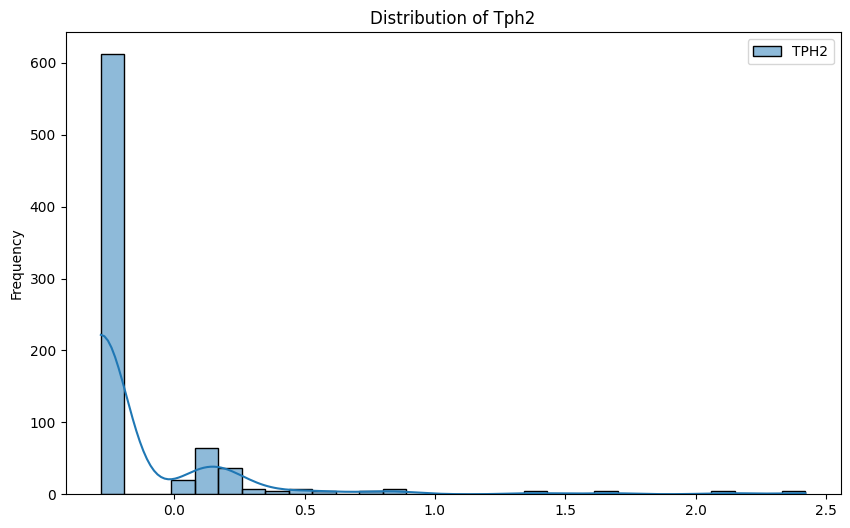

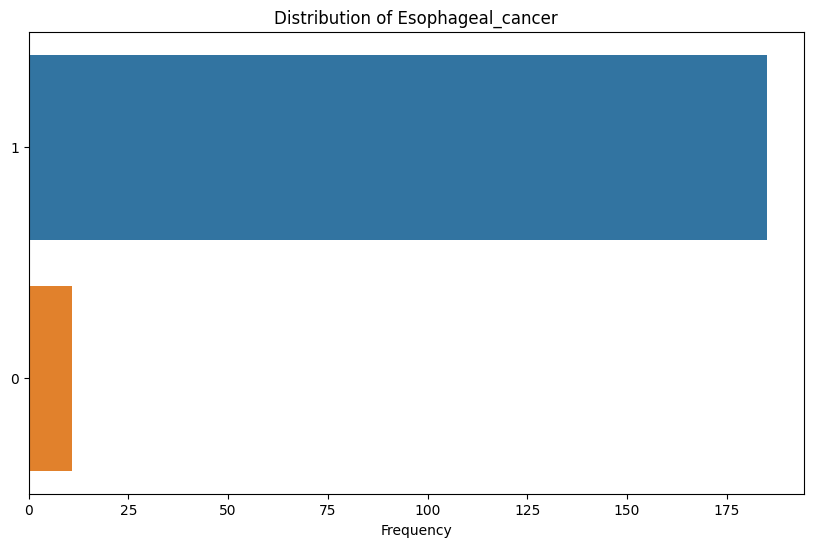

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_numeric_distribution(df, column):
    plt.figure(figsize=(10, 6))
    sns.histplot(df[column], kde=True, bins=30)
    plt.title(f'Distribution of {column.capitalize()}')
    plt.xlabel('')
    plt.ylabel('Frequency')
    plt.show()

def plot_categorical_distribution(df, column):
    plt.figure(figsize=(10, 6))
    sns.countplot(y=column, data=df, order=df[column].value_counts().index)
    plt.title(f'Distribution of {column.capitalize()}')
    plt.xlabel('Frequency')
    plt.ylabel('')
    plt.show()


def analyze_distributions(df, numerical_columns, categorical_columns):
    for col in numerical_columns:
        plot_numeric_distribution(df, col)

    for col in categorical_columns:
        plot_categorical_distribution(df, col)

# For example, we may want to choose a few genes we are interested in for visualization:
interested_genes = [col for col in gene_list if 'TPH2' in col.lower()]
analyze_distributions(merged_data, numerical_columns=[condition_col, *interested_genes], categorical_columns=[trait])


In [18]:
merged_data = merged_data.rename(columns={condition_col: condition})
feature_cols = merged_data.columns.tolist()[:-1]

merged_data.head()

,Depression,ARHGEF10L,HIF3A,RNF17,RNF10,RNF11,RNF13,GTF2IP1,REM1,MTVR2,...,NPY5R,GNGT2,GNGT1,TULP3,PTRF,BCL6B,GSTK1,SELP,SELS,Esophageal_Cancer
sampleID,,,,,,,,,,,,,,,,,,,,,
TCGA-2H-A9GF-01,0.125626,0.905608,2.586774,-0.531035,0.227628,-0.275778,-0.32701,-1.289094,-1.231746,-0.423399,...,-0.382817,-1.230133,1.01511,-0.429477,-1.012586,0.106073,-0.827495,0.259067,-1.428812,1
TCGA-2H-A9GG-01,0.597026,2.075308,1.644074,-0.531035,-0.143172,-0.389978,-0.39651,0.233506,0.620554,0.751601,...,-1.587117,-0.224433,3.53901,-0.964877,-1.049986,-0.431427,-0.706995,2.340467,-1.049812,1
TCGA-2H-A9GH-01,0.166126,0.349008,3.224974,0.257865,-0.210672,0.003622,0.37709,-0.351294,-1.346146,0.872701,...,-1.587117,-0.773233,1.56381,-0.829677,-1.502386,-0.810627,-1.082495,0.795767,0.119788,1
TCGA-2H-A9GI-01,-0.281574,1.206408,1.781674,-0.531035,-0.406872,-0.388078,-0.41441,-0.529194,-1.215746,1.512001,...,-1.587117,-1.576033,-1.28139,-1.311377,-1.231386,0.285473,0.053505,0.982167,0.308788,1
TCGA-2H-A9GJ-01,-0.281574,1.019308,6.337774,-0.531035,0.025328,0.140022,-0.00851,-0.402394,-1.498646,0.263501,...,2.379483,-2.163333,2.01751,-0.448977,-0.259786,-0.701427,-0.750295,0.332767,0.098188,1


In [19]:
import pandas as pd
from sparse_lmm import VariableSelection

def preprocess_data(X_train, X_test=None):
    # Normalize training data
    mean_train = np.mean(X_train, axis=0)
    std_train = np.std(X_train, axis=0)

    X_train_normalized = (X_train - mean_train) / std_train

    # Set columns with zero std to zero for training data
    zero_std_columns_train = np.where(std_train == 0)[0]
    X_train_normalized[:, zero_std_columns_train] = 0

    if X_test is not None:
        # Normalize test data using training data's mean and std
        X_test_normalized = (X_test - mean_train) / std_train
        X_test_normalized[:, zero_std_columns_train] = 0
    else:
        X_test_normalized = None

    return X_train_normalized, X_test_normalized

In [20]:
def cross_validation(X, y, k=5):
    indices = np.arange(X.shape[0])
    np.random.shuffle(indices)

    fold_size = len(X) // k
    accuracies = []

    for i in range(k):
        # Split data into train and test based on the current fold
        test_indices = indices[i*fold_size : (i+1)*fold_size]
        train_indices = np.setdiff1d(indices, test_indices)

        X_train, X_test = X[train_indices], X[test_indices]
        y_train, y_test = y[train_indices], y[test_indices]

        # Preprocess the train and test data
        X_train, X_test = preprocess_data(X_train, X_test)

        # Use the precision_lasso package for regression
        var_select = VariableSelection()
        var_select.fit(X_train, y_train)
        predictions = var_select.predict(X_test)

        # Turn the predictions into binary values using a threshold of 0.5
        binary_predictions = (predictions > 0.5).astype(int)

        # Calculate accuracy for this fold
        accuracy = np.mean(binary_predictions == y_test)
        accuracies.append(accuracy)

    return np.mean(accuracies), np.std(accuracies)

# Select relevant columns and convert to numpy array
y = merged_data[trait].values
X = merged_data.drop(columns=[trait]).values

cv_mean, cv_std = cross_validation(X, y)
print(f'The cross-validation accuracy is {(cv_mean * 100):.2f}% ± {(cv_std * 100):.2f}%')

<ipython-input-19-abef56c5c9ec>:9: RuntimeWarning: invalid value encountered in divide
  X_train_normalized = (X_train - mean_train) / std_train
<ipython-input-19-abef56c5c9ec>:17: RuntimeWarning: invalid value encountered in divide
  X_test_normalized = (X_test - mean_train) / std_train
/usr/local/lib/python3.10/dist-packages/sparse_lmm/helpingMethods.py:49: RuntimeWarning: invalid value encountered in divide
  ts = beta / np.sqrt(var * sigma)
<ipython-input-19-abef56c5c9ec>:17: RuntimeWarning: divide by zero encountered in divide
  X_test_normalized = (X_test - mean_train) / std_train


The cross-validation accuracy is 79.70% ± 7.01%


In [21]:
# Conduct regression on the whole dataset
# Instantiate the VariableSelection class
var_select = VariableSelection()

y = merged_data[trait].values
X = merged_data.drop(columns=[trait]).values

X, _ = preprocess_data(X)
# Fit the model
var_select.fit(X, y)

# Retrieve the coefficients
coefficients = var_select.getBeta().reshape(-1).tolist()
nlog_p_values = var_select.getNegLogP().reshape(-1).tolist()
p_values = [np.exp(-p) for p in nlog_p_values]

<ipython-input-19-abef56c5c9ec>:9: RuntimeWarning: invalid value encountered in divide
  X_train_normalized = (X_train - mean_train) / std_train
/usr/local/lib/python3.10/dist-packages/sparse_lmm/helpingMethods.py:49: RuntimeWarning: invalid value encountered in divide
  ts = beta / np.sqrt(var * sigma)


In [22]:
import pandas as pd
from statsmodels.stats.multitest import multipletests


# Create a DataFrame for the regression results
regression_df = pd.DataFrame({
    'Variable': feature_cols,
    'Coefficient': coefficients,
    'p_value': p_values
})

# Extract information about the lifestyle condition's effect
condition_effect = regression_df.iloc[0]

# Report the effect of the lifestyle condition
print(f"Effect of the condition on the target variable:")
print(f"Variable: {condition}")
print(f"Coefficient: {condition_effect['Coefficient']:.4f}")
print(f"p-value: {condition_effect['p_value']:.4g}\n")

Effect of the condition on the target variable:
Variable: Depression
Coefficient: -0.0003
p-value: 0.9834



In [23]:
threshold = 0.05
# Apply the Benjamini-Hochberg correction
rejected, corrected_p_values, _, _ = multipletests(regression_df['p_value'][1:], alpha=threshold, method='fdr_bh')

# Add the corrected p-values to the DataFrame (ignoring the first row which is the condition)
regression_df.loc[1:, 'corrected_p_value'] = corrected_p_values

# Now filter based on the corrected p-values
significant_genes = regression_df.loc[(regression_df.index > 0) & (regression_df['corrected_p_value'] < threshold)]
significant_genes_sorted = significant_genes.sort_values('corrected_p_value')

# Print and/or save your results as before
print(f"Genes with corrected p-value < {threshold}, affecting the trait {trait} conditional on the factor {condition}, sorted by corrected p-value:")
print(significant_genes_sorted[['Variable', 'Coefficient', 'corrected_p_value']].to_string(index=False))
print(f"\nFound {len(significant_genes_sorted)} significant genes with corrected p-value < {threshold}")
# Save this to a CSV file
significant_genes_sorted.to_csv('significant_genes_report_corrected.csv', index=False)


Genes with corrected p-value < 0.05, affecting the trait Esophageal_Cancer conditional on the factor Depression, sorted by corrected p-value:
   Variable  Coefficient  corrected_p_value
     SNAR-E     0.471939      1.940394e-167
      LCE4A    -0.471939      1.940394e-167
     TTTY20     0.471939      1.940394e-167
     OR10G9     0.471939      1.940394e-167
SNORD116-19     0.471939      1.940394e-167
    SNORA35    -0.471939      1.940394e-167
   ?|136542     0.471939      1.940394e-167
   SNORD88C    -0.471939      1.940394e-167
   C13orf28    -0.471939      1.940394e-167
     SNAR-D    -0.471939      1.940394e-167
    SNAR-B2    -0.471939      1.940394e-167
    SNORD90    -0.471939      1.940394e-167
   SNAR-A13    -0.471939      1.940394e-167
     TTTY3B     0.471939      1.940394e-167
    TTTY17B    -0.471939      1.940394e-167
     SNORD9    -0.471939      1.940394e-167
       LCN9    -0.471939      1.940394e-167
     TTTY21     0.471939      1.940394e-167
     PRR20B     0.4719